In [9]:
import os
import glob
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
from pathlib import Path

In [10]:
home = '/home/jovyan/work'
os.chdir(home)
#print(os.listdir('.'))
#print(os.getcwd())

In [11]:
def predict_image(model, path):
    size = (224, 224)
    image = Image.open(os.path.join(path))
    image = ImageOps.fit(image, size, Image.ANTIALIAS)
    image_array = np.asarray(image)
    if debug:
        image.show()
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data[0] = normalized_image_array
    prediction = model.predict(data)
    if debug:
        print(prediction)
    return prediction

In [12]:
def generate_game_state(model, prepath, segments_of_interest):
    gs = []
    for i in segments_of_interest:
        path = prepath + '_' + f'{i:05}' + '.jpg'
        prediction = predict_image(model, path)
        prediction = prediction[0]
        match_element = prediction[0]
        match = 0
        for j in range(1, len(prediction)):
            if prediction[j] > match_element:
                match_element = prediction[j]
                match = j
        output = 2
        output_friendly = 'undefined'
        if match == 0:
            output = 0
            output_friendly = 'black'
        if match == 1:
            output = 1
            output_friendly = 'white'
        if match == 2:
            output = 2
            output_friendly = 'empty'
        gs.append(output)
        if debug:
            print(output, output_friendly)
    
    # validity check 
    # ...
    if len(segments_of_interest) != len(gs):
        return generate_game_state(model, prepath, segments_of_interest)
    
    return gs

In [13]:
np.set_printoptions(suppress=True)
model = tensorflow.keras.models.load_model(home + '/models/converted_keras_4/keras_model.h5', compile=False)
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

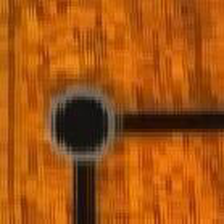

[[0.00007099 0.00021005 0.99806315 0.00165574]]
2 empty


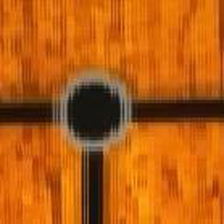

[[0.0000174  0.00004739 0.9999018  0.00003346]]
2 empty


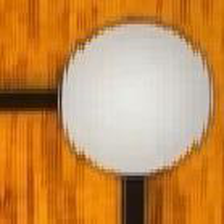

[[0.00091545 0.9990746  0.00000633 0.00000352]]
1 white


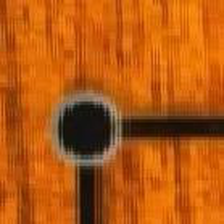

[[0.00023061 0.00028714 0.9989563  0.0005259 ]]
2 empty


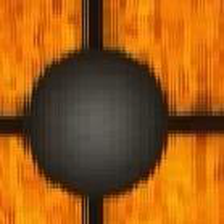

[[0.99984    0.0000834  0.00007649 0.00000001]]
0 black


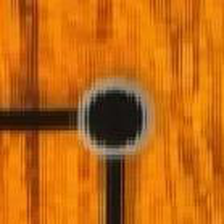

[[0.0000291  0.00017902 0.9997477  0.00004418]]
2 empty


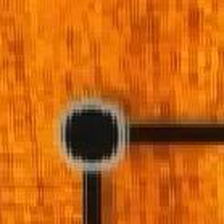

[[0.00005299 0.00008682 0.9998429  0.00001726]]
2 empty


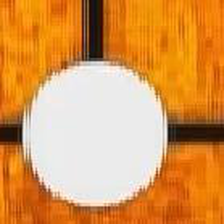

[[0.00001514 0.99998224 0.00000226 0.0000003 ]]
1 white


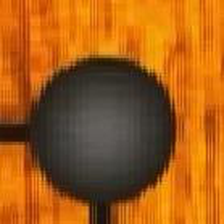

[[0.9999665  0.00003289 0.00000065 0.00000001]]
0 black


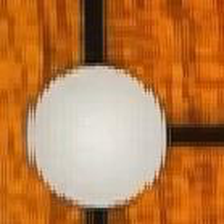

[[0.00009033 0.9999076  0.00000116 0.0000008 ]]
1 white


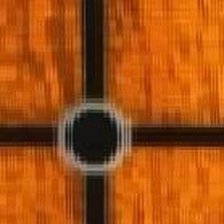

[[0.00001421 0.00013997 0.9998203  0.00002564]]
2 empty


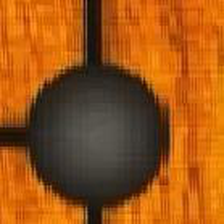

[[0.9999566  0.00003953 0.00000387 0.00000002]]
0 black


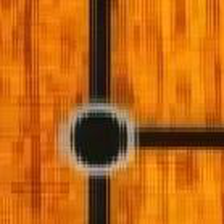

[[0.00001221 0.00006443 0.9998996  0.00002382]]
2 empty


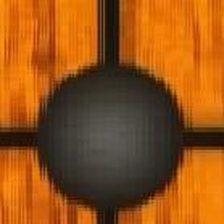

[[0.9997757  0.00018678 0.00003749 0.00000002]]
0 black


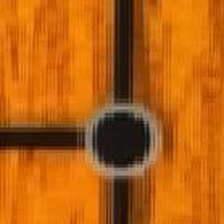

[[0.00005072 0.00062265 0.99929774 0.0000289 ]]
2 empty


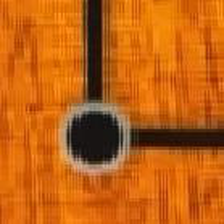

[[0.00006752 0.00006143 0.9998491  0.00002185]]
2 empty


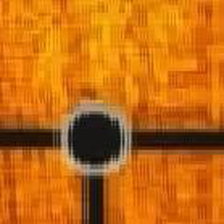

[[0.00007673 0.000032   0.99985766 0.00003359]]
2 empty


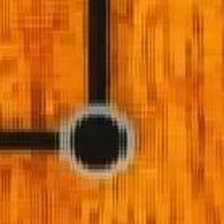

[[0.00083441 0.0000977  0.9990657  0.00000228]]
2 empty


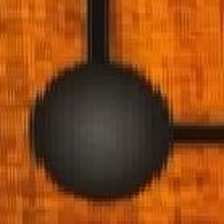

[[0.99993014 0.00005321 0.00001673 0.00000001]]
0 black


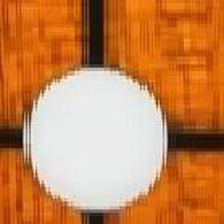

[[0.00001711 0.9999676  0.00001441 0.00000091]]
1 white


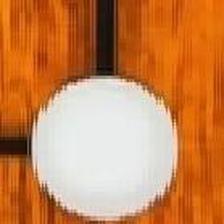

[[0.00008568 0.99990964 0.000003   0.00000167]]
1 white


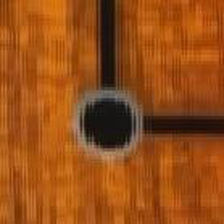

[[0.00044729 0.00037834 0.9991001  0.00007442]]
2 empty


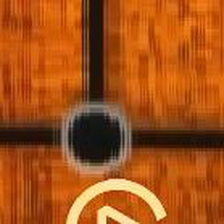

[[0.00004029 0.0021118  0.99784255 0.00000528]]
2 empty


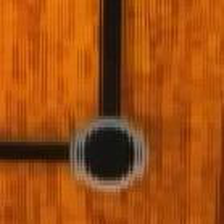

[[0.00072949 0.00469312 0.9910563  0.00352098]]
2 empty
[2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0]


In [15]:
debug = True

player = 0
phase = 0
segments_of_interest = [
    1, 4, 7,
    9, 11, 13,
    17, 18, 19,
    22, 23, 24, 26, 27, 28,
    31, 32, 33,
    37, 39, 41,
    43, 46, 49
]
prepath = home + '/images/output/mill_00008'
game_state = generate_game_state(model, prepath, segments_of_interest)
game_state.append(player)
game_state.append(phase)

#print(len(game_state))
print(game_state)